In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

In [4]:
datos_entrenamiento = tfds.load(name="rock_paper_scissors", split="train")
datos_prueba = tfds.load(name="rock_paper_scissors", split="test")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteFJJGN7/rock_paper_scissors-train.tfrecord


  0%|          | 0/2520 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteFJJGN7/rock_paper_scissors-test.tfrecord


  0%|          | 0/372 [00:00<?, ? examples/s]

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [5]:
imagenes_entrenamiento = np.array([example['image'].numpy()[:,:,0] for example in datos_entrenamiento])
etiquetas_entrenamiento = np.array([example['label'].numpy() for example in datos_entrenamiento])

imagenes_prueba = np.array([example['image'].numpy()[:,:,0] for example in datos_prueba])
etiquetas_pruebaa = np.array([example['label'].numpy() for example in datos_prueba])

In [6]:
imagenes_entrenamiento = imagenes_entrenamiento.reshape(2520, 300, 300, 1)
imagenes_prueba = imagenes_prueba.reshape(372, 300, 300, 1)

imagenes_entrenamiento = imagenes_entrenamiento.astype('float32')
imagenes_prueba = imagenes_prueba.astype('float32')

imagenes_entrenamiento /= 255
imagenes_prueba /= 255

In [7]:
print(imagenes_entrenamiento.shape)

(2520, 300, 300, 1)


In [25]:
modelo = keras.Sequential([
  keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)), # crea un promedio con las capas de entrada
  keras.layers.Conv2D(64, 3, activation='relu'), # capa de convolucion 
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPool2D(2,2), #maximiza el input
  keras.layers.Dropout(0.5), # reduce el sobreajuste
  keras.layers.Flatten(), #reduce los resultados (comprime) de matriz a lista
  keras.layers.Dense(128, activation='relu'), # activacion: positivo o cero
  keras.layers.Dense(3, activation='softmax') # activacion: probabilidad
])

modelo.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

historial = modelo.fit(imagenes_entrenamiento, etiquetas_entrenamiento, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 114s 1s/step - loss: 0.7538 - accuracy: 0.7083
Epoch 2/5
79/79 [==============================] - 110s 1s/step - loss: 0.1051 - accuracy: 0.9794
Epoch 3/5
79/79 [==============================] - 110s 1s/step - loss: 0.0274 - accuracy: 0.9960
Epoch 4/5
79/79 [==============================] - 110s 1s/step - loss: 0.0112 - accuracy: 0.9984
Epoch 5/5
79/79 [==============================] - 110s 1s/step - loss: 0.0109 - accuracy: 0.9988


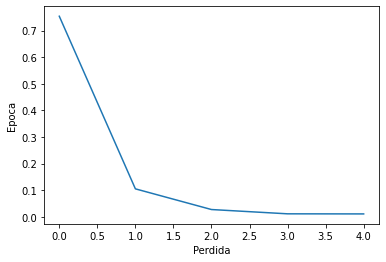

In [26]:
plt.ylabel("Epoca")
plt.xlabel("Perdida")
plt.plot(historial.history["loss"])

In [27]:
modelo.evaluate(imagenes_prueba, etiquetas_pruebaa)

12/12 [==============================] - 4s 359ms/step - loss: 0.7839 - accuracy: 0.7016


[0.7839120030403137, 0.7016128897666931]

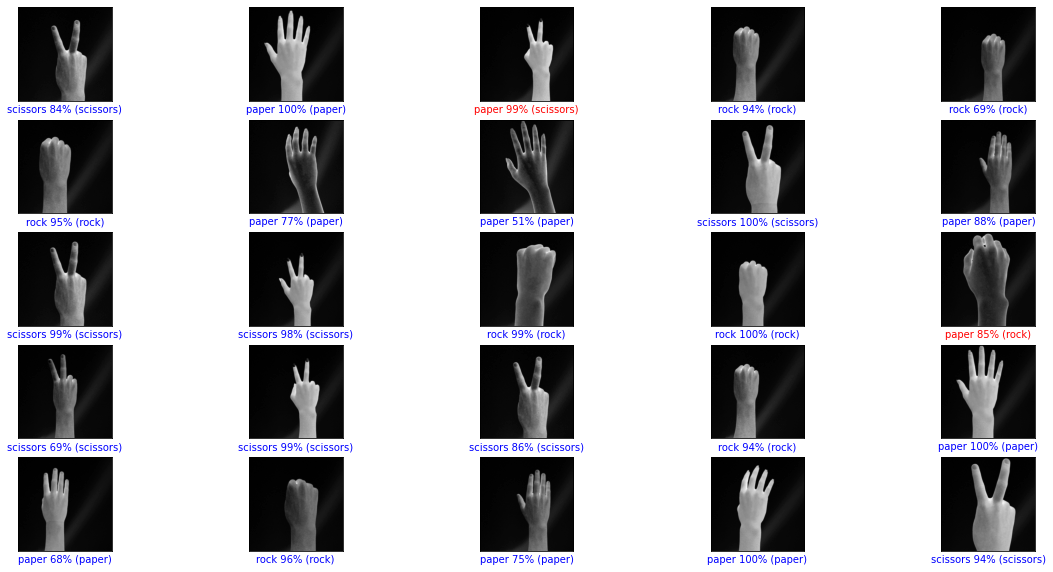

In [29]:
nombres_clases = info.features['label'].names

predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  #grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  #grafica[etiqueta_prediccion].set_color('red')
  #grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, columnas, i+1)
  graficar_imagen(i, predicciones, etiquetas_pruebaa, imagenes_prueba)
  